[ 1.          0.77968076 -0.63963533 -0.27402127 -0.1286533  -0.33082336
 -0.43714482 -0.44813056 -0.54537988 -0.55020504 -0.52604051  0.06291391
  0.61234423]


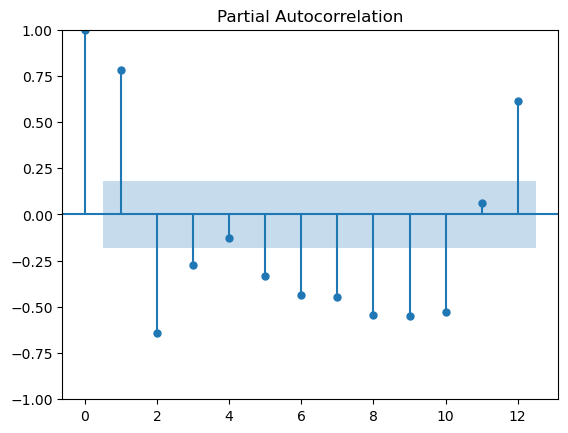


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -711.045
Date:                Wed, 17 Jan 2024   AIC                           1432.091
Time:                        10:48:48   BIC                           1446.028
Sample:                             0   HQIC                          1437.751
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.6764     23.674      9.786      0.000     185.276     278.077
ar.L1          1.2170      0.084     14.509      0.000       1.053       1.381
ar.L2         -0.4072      0.151     -2.705      0.

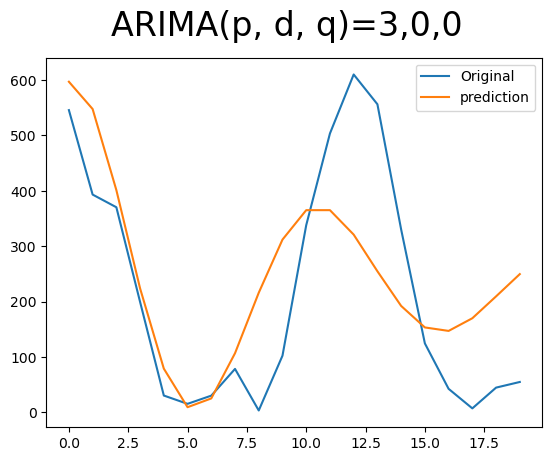

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, _prepare_data_corr_plot
from statsmodels.tsa.arima.model import ARIMA

def create_AR(data, lag, future, predict_point, diff=None):
    real_data = np.array(data)

    if diff!=None:
        data = data.diff(axis=0).dropna()

    plot_pacf(data, lags=lag)
    pacf, pacf_confint = sm.tsa.stattools.pacf(data, nlags=lag, alpha=0.05)
    print(pacf)
    plt.show()

    if lag==None:
        x, _, _ = _prepare_data_corr_plot(data, lag, zero=True)
    else:
        x = np.arange(lag + 1)

    if x[0] == 0:
        x = x[1:]
        pacf_confint = pacf_confint[1:]
        pacf = pacf[1:]
    x = x.astype(float)
    x[0] -= 0.5
    x[-1] += 0.5

    upper_limit = np.round(pacf_confint[:, 1] - pacf, 5)
    lower_limit = np.round(pacf_confint[:, 0] - pacf, 5)

    # set parameter
    p = np.where((upper_limit>pacf)&(lower_limit<pacf))[0]
    if len(p)>0:
        p = p[0]
    else:
        p = None

    if diff is not None:
        d = diff
    else:
        d = 0

    q = 0

    # ARIMA prediction
    if p is not None:
        print()
        create_ARIMA(real_data, future, p, d, q, predict_point)

def create_ARIMA(data, future, p, d, q, predict_point):
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=predict_point)
    # yhat = model_fit.predict(steps=predict_point)
    print(model_fit.summary())

    plt.plot(future, label="Original")
    plt.plot(yhat, label="prediction")
    plt.suptitle("ARIMA(p, d, q)="+str(p)+","+str(d)+","+str(q), size=24)
    plt.legend()
    plt.show()

if __name__ == '__main__':
    input_point = 120
    predict_point = 20

    lag = 12  # lag default: None, or 1, 2, ...
    diff = None    # 차분 X: None, 1차 차분: 1, 2차 차분: 2...

    df = pd.DataFrame(pd.read_csv("CDDHDD.csv")["sum"])
    data = df[:input_point]

    future = np.array(df[input_point:input_point+predict_point])

    create_AR(data=data, lag=lag, future=future, predict_point=predict_point, diff=diff)

In [ ]:
def create_MV(data, lag, future, predict_point, diff=None):
    real_data = np.array(data)

    if diff!=None:
        data = data.diff(axis=0).dropna()

    plot_acf(data, lags=lag)
    acf, acf_confint = sm.tsa.stattools.acf(data, nlags=lag, alpha=0.05, fft=False)
    print(acf)
    plt.show()

    if lag==None:
        x, _, _ = _prepare_data_corr_plot(data, lag, zero=True)
    else:
        x = np.arange(lag + 1)

    if x[0] == 0:
        x = x[1:]
        acf_confint = acf_confint[1:]
        acf = acf[1:]
    x = x.astype(float)
    x[0] -= 0.5
    x[-1] += 0.5

    upper_limit = np.round(acf_confint[:, 1] - acf, 5)
    lower_limit = np.round(acf_confint[:, 0] - acf, 5)

    # set parameter
    p = 0

    if diff is not None:
        d = diff
    else:
        d = 0
    q = np.where((upper_limit>acf)&(lower_limit<acf))[0]

    if len(q)>0:
        q = q[0]
    else:
        q = None

    # ARIMA prediction
    if q is not None:
        create_ARIMA(real_data, future, p, d, q, predict_point)
        
if __name__ == '__main__':
    input_point = 120
    predict_point = 20

    lag = None  # lag default: None, or 1, 2, ...
    diff = None    # 차분 X: None, 1차 차분: 1, 2차 차분: 2...

    df = pd.DataFrame(pd.read_csv("CDDHDD.csv")["sum"])
    data = df[:input_point]

    future = np.array(df[input_point:input_point+predict_point])
    
    create_MV(data=data, lag=lag, future=future, predict_point=predict_point, diff=diff)